In [ ]:
path='/content/Roman Urdu DataSet (1).csv'

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score
from collections import Counter
from sklearn import tree,svm

In [ ]:
df=pd.read_csv(path,header=None)
df.columns=['Reviews','Sentiment','Empty']
df.head()

,Reviews,Sentiment,Empty
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


In [ ]:
df2=df[['Reviews','Sentiment']]

In [ ]:
df2.isna().sum()

Reviews      1
Sentiment    0
dtype: int64

In [ ]:
df2.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df2['Sentiment'].value_counts()

Neutral     8929
Positive    6013
Negative    5286
Neative        1
Name: Sentiment, dtype: int64

In [ ]:
#Fixing spelling of one incorrect row
df2['Sentiment'].replace('Neative','Negative',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:

#not interested in neutral sentiment
df2=df2[df2['Sentiment']!='Neutral']

In [ ]:
#Checking to see if the spelling is actually fixed
df2['Sentiment'].value_counts()

Positive    6013
Negative    5287
Name: Sentiment, dtype: int64

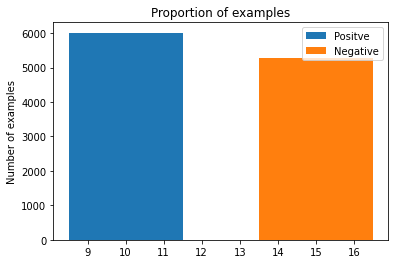

In [ ]:
Pos = df2[df2['Sentiment'] == 'Positive'].shape[0]
Neg = df2[df2['Sentiment'] == 'Negative'].shape[0]
# bar plot of the 2 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

##Text cleaning

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def cleaning(message):
    stopwords=['ai','ayi','hy','hai','main','ki','tha','ye','ko','b','na','sy','de','dy','kr','kia','kay','per','tou','wou','wo','ne','ny','k','ky','u','sy','gai',
              'rhy','kuch','jata','aye','ya','de','jb','krta','lg','rahi','hui','gi','hova','yehi','jana','jye','tu',
              'hum','par','hay','kis','sb','gy','tou','kch','ab','thy','thay','houn','hain','han','to','is','hi','jo','kya','thi','se','pe','phr','us','na','ny','hun','woh','bhi',
              'aur','wo','yeh','rha','hota','ho','ga','ka','le','lye', 'kr','nhi','main','tha','mein','sy','ja','e','o','hai','ar','h','pr','j','t','c']
    punc_removed=[str(char) for char in message if char not in string.punctuation if not char.isdigit() if char not in stopwords]
    punc_removed_join="".join(punc_removed)
    return punc_removed_join

In [ ]:
df2['Reviews'] = df2['Reviews'].astype(str)
df2['Reviews']=df2['Reviews'].apply(cleaning)
df2.head()

,Reviews,Sentiment
0,Sai a ya r isi ay s i a ni ai lain main i al a...,Positive
1,sai,Positive
2,Kya ai,Positive
3,Wa wa,Positive
4,Ar wa aya a ai,Positive


##Word Cloud

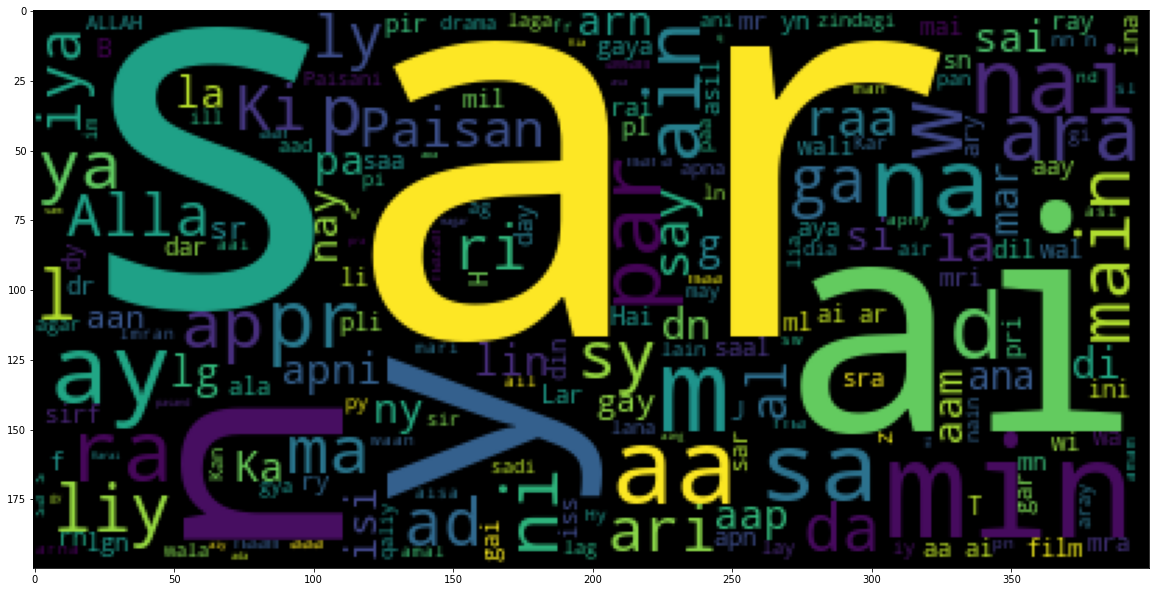

In [ ]:
sentence=df2['Reviews'].tolist()
one_sentence="".join(sentence)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_sentence))

##Wordcloud of Positive reveiws

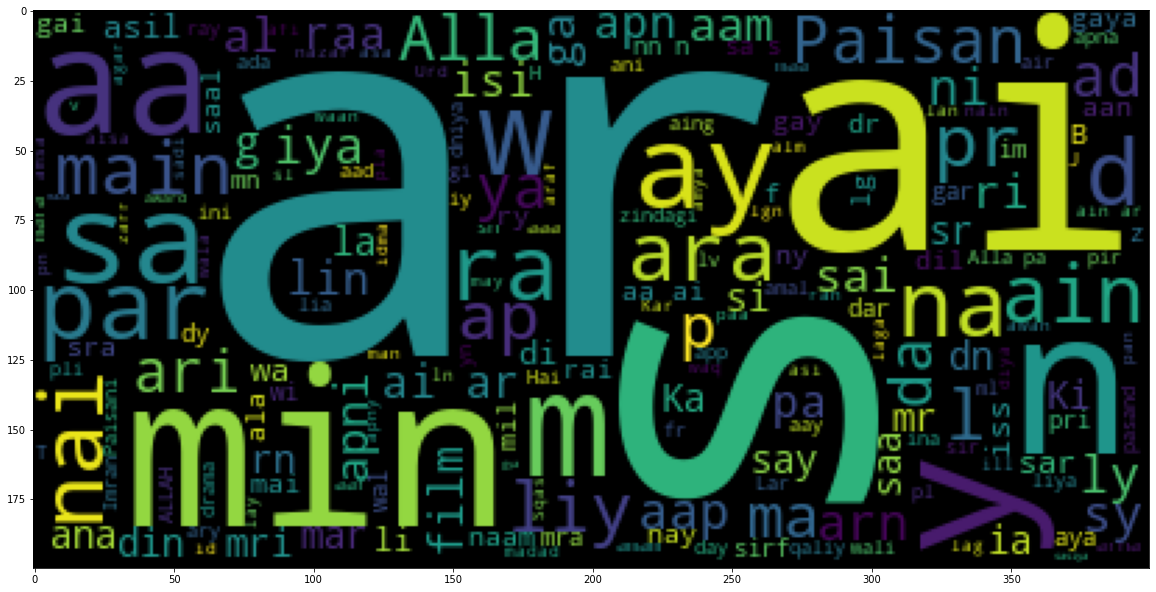

In [ ]:
sentence=df2['Reviews'][df2["Sentiment"] == 'Positive'].tolist()
one_sentence="".join(sentence)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_sentence))

##Wordcloud of negative sentiments

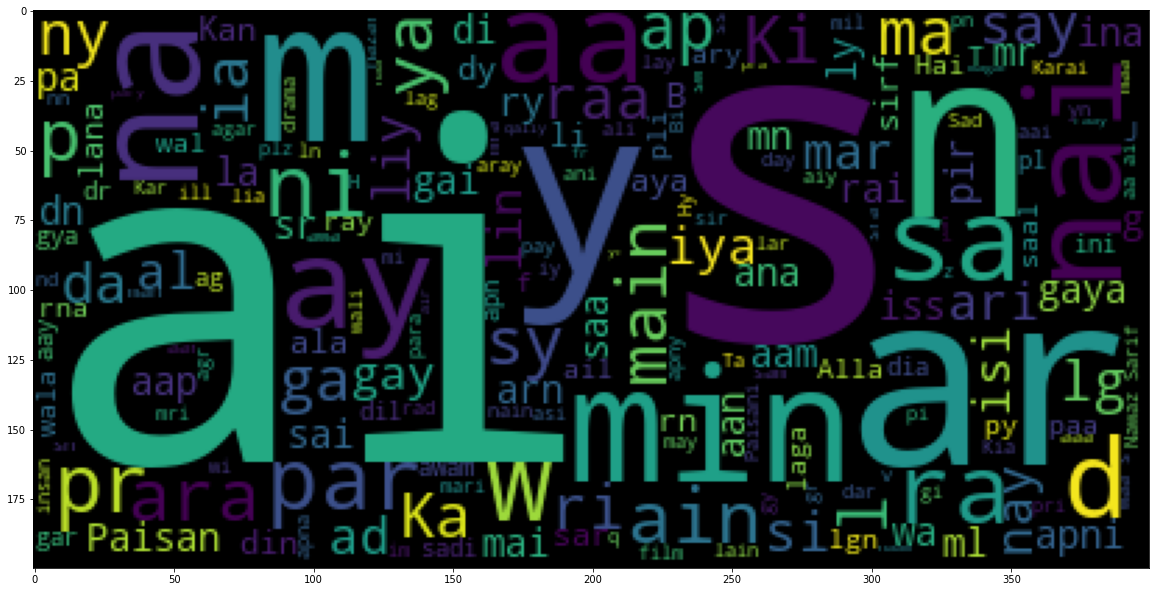

In [ ]:
sentence=df2['Reviews'][df2["Sentiment"] == 'Negative'].tolist()
one_sentence="".join(sentence)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_sentence))


#Machine Learning Algos

###KNN


In [ ]:
class KNearestNeighbours:
  #p=2 euclidean distance, p=1 manhattan distance
    def __init__(self,n_neighbours=3,p=2):
      self.n_neighbours=n_neighbours
      self.p=p
    def fit(self,X,Y):
      self.X=X
      self.Y=Y

    def euclidean_distance(self,x1, x2):
      distance=np.sqrt(np.sum((x1-x2)**2))
      return distance
    def predict(self,X_test):
      #for each data point in test set, predict its class
      predictions=[self._predict(x) for x in X_test]
      return predictions
    def _predict(self,x):
      #for each test data point,compute its distance from every training point
      distances=[self.euclidean_distance(x,x_train_point) for x_train_point in self.X]
      #Finding k nearest neigbours
      #sorting in ascending order,getting top 5 indices
      k_nearest_indices=np.argsort(distances)[:5]
      #getting labels of these indices
      k_nearest_labels=[self.Y[i] for i in k_nearest_indices]
      #majority vote;returns all elemnts along with their counts
      predicted_class=Counter(k_nearest_labels).most_common()
      #Since counter returns list of tuples with item along its count,choosing the first one
      return predicted_class[0][0]
    def accuracy(self,y_test,predictions):
      return np.sum(predictions==y_test) /len(y_test)






###Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self,learning_rate=0.0001,iterations=100):
      self.learning_rate=learning_rate
      self.iterations=iterations
      self.weights=None
      self.bias=None

    def sigmoid(self,y):
      return 1+(1+np.exp(-y))

    def fit(self,X,Y):
      self.X=X
      self.Y=Y
      samples,features=X.shape  ##(rows,cols)
      self.weights=np.zeros(features)
      self.bias=0
      #for n no of iterations
      for i in range(self.iterations):
        #calculate y=mx+b
        y=np.dot(X,self.weights)+self.bias
        #suppyling to sigmoid function
        predictions=self.sigmoid(y)
        #gradidents for weights and bias
        dw=(1/samples)* np.dot(X.T,predictions-Y)
        db=(1/samples)*np.sum(predictions-Y)
        #updating weights and bias
        self.weights=self.weights-self.learning_rate*dw
        self.bias=self.bias-self.learning_rate*db
    def predict(self,X_test):
        y=np.dot(X_test,self.weights)+self.bias
        predictions=self.sigmoid(y)
        label_predicted=[0 if y_pred<0.5 else 1 for y_pred in predictions]
        return label_predicted
    def accuracy(self,y_test,predictions):
        return np.sum(predictions==y_test) /len(y_test)





##Text pre-processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X=df2['Reviews']
Y=df2['Sentiment']


##Working of tf-idf
##### TF= total number of times term t is present in a review A/ total no of terms in review A
##### IDF=log(Total no of reviews / no of reviews containing term t)



In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X) #Sparse matrix
le=LabelEncoder()
#transfroms array of n*1 into 1*n i-e converts into 1d array
Y=le.fit_transform(Y).ravel()

In [ ]:
X[:2]

<2x13836 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
dict(zip(le.classes_,range(len(le.classes_))))

{'Negative': 0, 'Positive': 1}

In [ ]:
X= pd.DataFrame(X.toarray() ,columns=vectorizer.get_feature_names())
X=X.values


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X[:60]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0823813, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

##Splitting dataset

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)
Y.shape

(11300,)

In [ ]:
X.shape

(11300, 13836)

##Applying algorithms

##Applying KNN

In [ ]:
knn=KNearestNeighbours(5)
knn.fit(X_train,Y_train)
y_predict_test=knn.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
acc=knn.accuracy(Y_test,y_predict_test)
prec=precision_score(Y_test,y_predict_test)
recal=recall_score(Y_test,y_predict_test)

In [ ]:
print('*** Performance of self implemented KNN ***\n')
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

##Applying Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_predict_test=lr.predict(X_test)

In [ ]:
acc=lr.accuracy(Y_test,y_predict_test)
prec=precision_score(Y_test,y_predict_test)
recal=recall_score(Y_test,y_predict_test)

In [ ]:
print('*** Performance of self implemented Logistic Regression ***\n')
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

##Using Models from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
accuracy_results=[]
precision_results=[]

##Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)

In [ ]:
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

Accuracy score: 0.7535398230088496 

Precision score: 0.7647540983606558 

Recall score 0.7755610972568578 



##KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)

In [ ]:
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

Accuracy score: 0.55 

Precision score: 0.5462686567164179 

Recall score 0.912718204488778 



##Decision Trees

In [ ]:
from sklearn import tree
tree=tree.DecisionTreeClassifier()
tree.fit(X_train,Y_train)
prediction=tree.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)


In [ ]:
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

Accuracy score: 0.6367256637168142 

Precision score: 0.6523125996810207 

Recall score 0.6799667497921862 



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
prediction=rf.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)


##SVM

In [ ]:
svm=svm.SVC()
svm.fit(X_train,Y_train)
prediction=svm.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)

In [ ]:
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

Accuracy score: 0.7933628318584071 

Precision score: 0.8303411131059246 

Recall score 0.7689110556940981 



##Naive Bayes

In [ ]:
nb=MultinomialNB()
nb.fit(X_train,Y_train)
prediction=nb.predict(X_test)
acc=accuracy_score(Y_test,prediction)
prec=precision_score(Y_test,prediction)
recal=recall_score(Y_test,prediction)
accuracy_results.append(acc)
precision_results.append(prec)

In [ ]:
print('Accuracy score:',acc,'\n')
print('Precision score:',prec,'\n')
print('Recall score',recal,'\n')

Accuracy score: 0.7853982300884956 

Precision score: 0.7612809315866085 

Recall score 0.8694929343308395 



##Visually comparing performance of algorithms

###Comparison of accuracy of 5 models

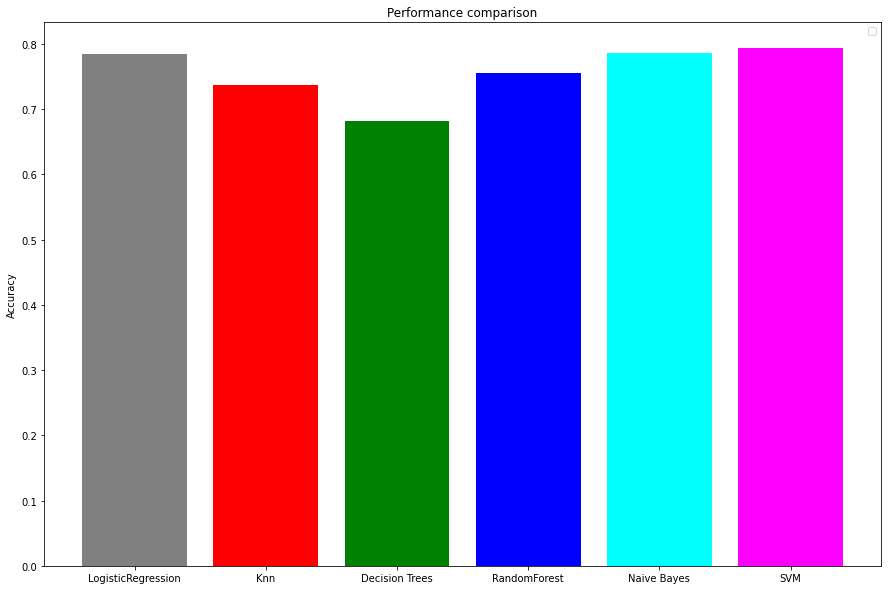

In [ ]:
plt.figure(figsize=(15,10))
names=['LogisticRegression','Knn','Decision Trees','RandomForest','Naive Bayes','SVM']
plt.bar(names,accuracy_results,color=['gray', 'red', 'green', 'blue', 'cyan','magenta'])
plt.legend()
plt.ylabel('Accuracy')
plt.title('Performance comparison')
plt.show()

###Comparison of precision of 5 models

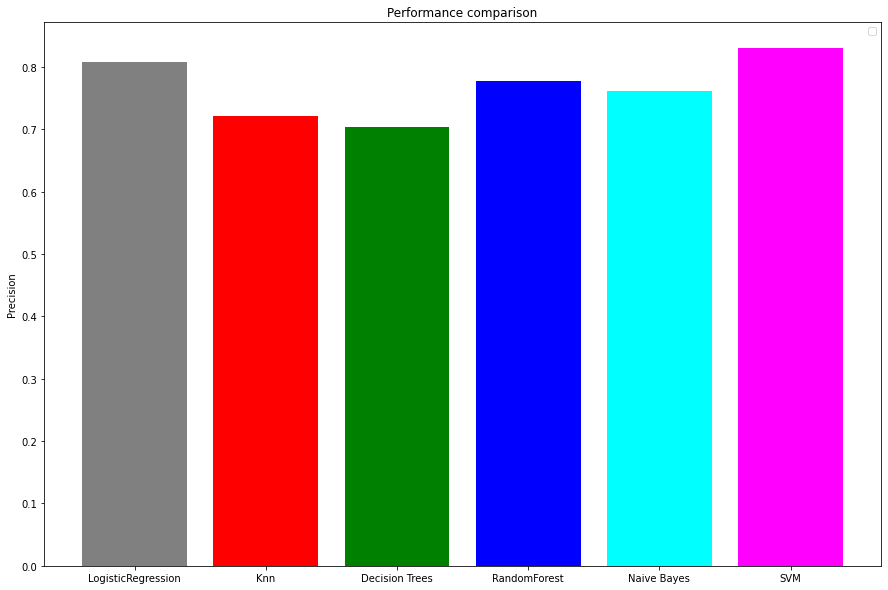

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(names,precision_results,color=['gray', 'red', 'green', 'blue', 'cyan','magenta'])
plt.legend()
plt.ylabel('Precision')
plt.title('Performance comparison')
plt.show()